In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import numpy.linalg as linalg
from numpy.linalg import inv
from copy import deepcopy

from pynput.mouse import Controller

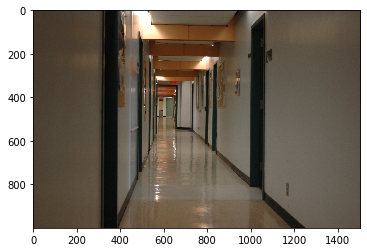

In [2]:
img1 = cv2.imread('Q4/hallway1.jpg')
img2 = cv2.imread('Q4/hallway2.jpg')
img3 = cv2.imread('Q4/hallway3.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
img3 = cv2.cvtColor(img3, cv2.COLOR_RGB2BGR)
plt.imshow(img1)


In [9]:
# plot square around selected points
def plot_green_squares(img, x,y):
    kernel = 30
    m,n = img.shape[0], img.shape[1]
    x, y = int(x), int(y)
    left_x, left_y = max(0, x - kernel), max(0, y-kernel)
    right_x, right_y = min(n-1, x + kernel), min(m-1, y + kernel)
    return cv2.rectangle(img, (left_x, left_y), (right_x, right_y), (0,255,0), 3)

def plot_red_squares(img, x,y):
    kernel = 30
    m,n = img.shape[0], img.shape[1]
    x, y = int(x), int(y)
    left_x, left_y = max(0, x - kernel), max(0, y-kernel)
    right_x, right_y = min(n-1, x + kernel), min(m-1, y + kernel)
    return cv2.rectangle(img, (left_x, left_y), (right_x, right_y), (255,0,0), 3)


In [8]:
def choose_points():
    img1_points_A = [[730, 560], [730, 340], [1000,100], [840, 650], [880, 450],[1400,200],[1400,600], [1000,600]]
    img2_points_A = [[600,880], [600,670], [850, 400], [700, 960], [740,770], [1400,400],[1400,800], [870,900]]
    
    img1_points_B = [[730,550], [730, 340], [1000,90], [1000,800], [940,390], [1300,300],[820,630]]
    img3_points_B = [[750,750], [750, 530], [900,270], [920,980], [880,590], [1200,500], [810,830]]
    
    img2_floor_C = [[480,780], [530,660], [660,550], [730,550], [1000,810]]
    img3_floor_C = [[410,780], [520,860], [600,700], [690,740], [920,1000]]
    return img1_points_A, img2_points_A, img1_points_B, img3_points_B, img2_floor_C, img3_floor_C

def make_projection_matrix(point1, point2):
    n = len(point1)
    result = np.zeros((2*n, 9))
    for i in range(n):
        x1, y1 = point1[i][0], point1[i][1]
        x2, y2 = point2[i][0], point2[i][1]
        result[2*i] = np.array([x1,y1,1,0,0,0,-x2*x1, -x2*y1, -x2])
        result[2*i+1] = np.array([0,0,0,x1,y1,1,-y2*x1, -y2*y1, -y2])
    return result




In [10]:
def homography(choose):
    img1_points, img2_points, img1_points_B, img3_points_B, img2_floor, img3_floor = choose_points()
    project_image = {"A": img2, "B": img3, "C":img3}
    if choose == "A":
        A = make_projection_matrix(img1_points, img2_points)
        H = get_H(A)[1]
        H = H.reshape(3,3)
        X_project = []
        for i in range(len(img1_points)):
            points = img1_points[i]
            proj_point = proj_points(H, points[0], points[1])
            X_project.append([proj_point[0], proj_point[1]])
    elif choose == "B":
        A = make_projection_matrix(img1_points_B, img3_points_B)
        H = get_H(A)[1]
        H = H.reshape(3,3)
        X_project = []
        for i in range(len(img1_points_B)):
            points = img1_points_B[i]
            proj_point = proj_points(H, points[0], points[1])
            print("proj", proj_point)
            X_project.append([proj_point[0], proj_point[1]])
    elif choose == "C":
        A = make_projection_matrix(img2_floor, img3_floor)
        H = get_H(A)[1]
        H = H.reshape(3,3)
        X_project = []
        for i in range(len(img2_floor)):
            points = img2_floor[i]
            proj_point = proj_points(H, points[0], points[1])
            X_project.append([proj_point[0], proj_point[1]])
    else:
        print("invlid inpput")
    
    # plot projection points on images
    img = project_image[choose]
    for points in X_project:
        img = plot_red_squares(img, points[0], points[1])
    plt.imshow(img)
    return X_project, H

def get_H(A):   
    u, s, v = np.linalg.svd(A)
    return s[-1], v[-1]

def proj_points(H, x,y):
    # d = H[2][0]*x + H[2][1]*y + H[2][2]
    # p1 = (H[0][0]*x + H[0][1]*y + H[0][2]) / d
    # p2 = (H[1][0]*x + H[1][1]*y + H[1][2]) / d
    point = np.array([x,y,1])
    proj_p = H @ point
    p1 = proj_p[0]/proj_p[2]
    p2 = proj_p[1]/proj_p[2]
    return p1,p2





In [11]:
img1_points_A = [[730, 560], [730, 340], [1000,100], [840, 650], [880, 450],[1400,200],[1400,600], [1000,600]]
img2_points_A = [[600,880], [600,670], [850, 400], [700, 960], [740,770], [1400,400],[1400,800], [870,900]]
    
img1_points_B = [[730,550], [730, 340], [1000,90], [1000,800], [940,390], [1300,300],[820,630]]
img3_points_B = [[750,750], [750, 530], [900,270], [920,980], [880,590], [1200,500], [810,830]]

img2_floor_C = [[480,780], [530,660], [660,550], [730,550], [1000,810]]
img3_floor_C = [[410,780], [520,860], [600,700], [690,740], [920,1000]]

# img_temp = deepcopy(img1)
# for points in img2_floor_C:
#     plot_red_squares(img_temp, points[0], points[1])
# plt.imshow(img_temp)

# img_temp = deepcopy(img3)
# for points in img3_points_B:
#     plot_red_squares(img_temp, points[0], points[1])
# plt.imshow(img_temp)

[[-9.43439137e-04  3.56097706e-05 -1.41730860e-01]
 [ 5.88455422e-04 -1.13663722e-03 -9.89902394e-01]
 [ 4.95429668e-07  6.37406871e-08 -1.75617886e-03]]


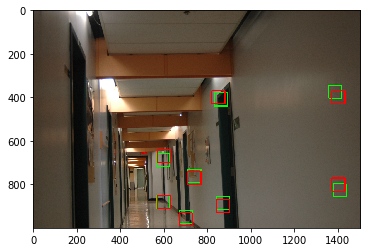

In [12]:
X_project_99, H_99 = homography("A")
print(H_99)
img_99 = cv2.imread('Q4/hallway2.jpg')
img_99 = cv2.cvtColor(img_99, cv2.COLOR_RGB2BGR)
for points in X_project_99:
    img_99 = plot_green_squares(img_99, points[0], points[1])
for points in img2_points_A:
    img_99 = plot_red_squares(img_99, points[0], points[1])
plt.imshow(img_99)

In [13]:
# def homography_back_point(H, x,y):
#     H_inv = inv(H)
#     proj_point = proj_points(H_inv, x, y)
#     return proj_point    

# # back projection
# X_project_100, H_100 = homography("A")
# X_project = []
# for points in img2_points:
#     proj_point = homography_back_point(H, points[0], points[1])
#     X_project.append(proj_point)
# img_100 = deepcopy(img1)
# img_100 = cv2.cvtColor(img_100, cv2.COLOR_BGR2GRAY) 
# for points in X_project:
#     img_100 = plot_green_squares(img_100, points[0], points[1])
# for points in img1_points:
#     img_100 = plot_red_squares(img_100, points[0], points[1])
# plt.imshow(img_100)

Question 4

In [13]:
def homography_whole_image(H, whole_img):
    m,n = whole_img.shape[0], whole_img.shape[1]
    X_project = []
    for i in range(m):
        for j in range(n):
            points = np.array([i,j])
            proj_point = proj_points(H, points[0], points[1])
            X_project.append([proj_point[0], proj_point[1]])
    return X_project
    

def homography_back(H, whole_img):
    H_inv = inv(H)
    m,n = whole_img.shape[0], whole_img.shape[1]
    X_project = []
    for i in range(m):
        for j in range(n):
            proj_point = homography_back_point(H_inv, j, i)
            X_project.append((proj_point[0], proj_point[1], whole_img[i][j]))
    return X_project

def homography_back_point(H_inv, x,y):
    proj_point = proj_points(H_inv, x, y)
    return proj_point    


In [14]:
def construct_final_img(H, img_1, img_2):
    m,n = img_1.shape[0], img_1.shape[1]
    img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY) 
    img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY) 
    
    shift = 800
    final_img = np.zeros((2000, 3000, 3))
    final_img[shift:shift+m, shift:shift+n,0] = img_1/255
    
    X_project = homography_back(H, img_2)
    
    for items in X_project:
        x_back, y_back,color = int(items[0]), int(items[1]), items[2]
        final_img[y_back + shift, x_back + shift, 1] = color/255
        final_img[y_back + shift, x_back + shift, 2] = color/255
    plt.imshow(final_img)
    return final_img

construct_final_img(H_99, img1, img2)
    

KeyboardInterrupt: 

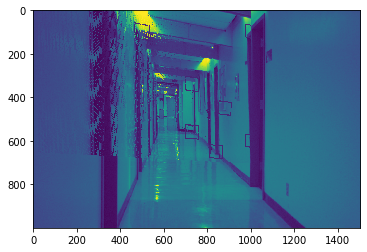

In [299]:
# test Projection whole image back
img_299 = cv2.cvtColor(deepcopy(img2), cv2.COLOR_BGR2GRAY) 
img_199 = cv2.cvtColor(deepcopy(img1), cv2.COLOR_BGR2GRAY) 
X_project_99 = homography_back(H_99, img_299)
for items in X_project_99:
    x_back, y_back,color = int(items[0]), int(items[1]), items[2]
    if x_back in range(img_199.shape[0]) and y_back in range(img_199.shape[1]):
        # if x_back in range(500,550) and y_back in range(500,550):
        #     print("color", color)
        img_199[y_back , x_back] = color
plt.imshow(img_199)